### Data Set Information:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
* Bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
* Related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone') 
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Other attributes:
v12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* Social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')

# plt.rcParams.update({'font.size': 10})
# plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
%matplotlib inline
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)

In [74]:
# #colorbrewer2 Dark2 qualitative color table
# import brewer2mpl
# from matplotlib import rcParamss
# dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
# dark2_colors = dark2_cmap.mpl_colors
# rcParams['figure.figsize'] = (10, 6)
# rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
# rcParams['lines.linewidth'] = 2
# rcParams['axes.facecolor'] = 'white'
# rcParams['font.size'] = 14
# rcParams['patch.edgecolor'] = 'white'
# rcParams['patch.facecolor'] = dark2_colors[0]
# rcParams['font.family'] = 'StixGeneral'

In [75]:
df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/data/bank/bank-full.csv', delimiter=';')
# df = pd.read_csv('/Users/stevalang/Galvanize/0002_capstones/capstone1/data/bank/bank-full.csv', delimiter=';',
#                 na_values = 'unknown')

In [76]:
# look at the first five rows of the bank-full.csv file. 
# I can see a handful of unknown data already!
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [57]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [58]:
df.shape

(45211, 17)

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [63]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,age,int64,0,0.0,77,"[33, 52, 30, 26]"
1,job,object,0,0.0,12,"[management, retired, self-employed, technicia..."
2,marital,object,0,0.0,3,"[married, single]"
3,education,object,0,0.0,4,"[secondary, primary, tertiary]"
4,default,object,0,0.0,2,"[no, yes]"
5,balance,int64,0,0.0,7168,"[2780, 36, 469, 2552, 183]"
6,housing,object,0,0.0,2,[yes]
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,[cellular]
9,day,int64,0,0.0,31,"[29, 27, 31, 15, 11]"


In [64]:
# Check Unique values of all the column
# for x in df[['age', 'job','marital','education','default','balance','housing','loan','contact','day',
#              'month','duration','campaign', 'campaign','pdays', 'previous','poutcome', 'y']].columns:
#     print(f'{x}: \n{df[x].unique()}\n')

for i in df.columns:
    print(i)
    print(df[i].unique())
    print('----'*20)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------------------------------------
marital
['married' 'single' 'divorced']
--------------------------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------------------------------------
default
['no' 'yes']
--------------------------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
-----------------------------------

In [65]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,age,int64,0,0.0,77,"[58, 36, 35, 37, 34]"
1,job,object,0,0.0,12,"[technician, admin., services, unknown, manage..."
2,marital,object,0,0.0,3,"[married, single]"
3,education,object,0,0.0,4,"[secondary, tertiary, primary]"
4,default,object,0,0.0,2,[no]
5,balance,int64,0,0.0,7168,"[4123, 1906, 499, 451, 533]"
6,housing,object,0,0.0,2,"[no, yes]"
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,"[telephone, cellular, unknown]"
9,day,int64,0,0.0,31,"[27, 15, 5, 18, 20]"


In [66]:
# List of non numeric columns
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [67]:
# Categorical Variables:
category_cols = list(df.select_dtypes(include=['object']))
category_cols


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [68]:
# get the number of missing data points per column
# missing_values_count = df.isnull().sum()
# missing_values_count = df.isna().sum()
# missing_values_count

In [70]:
# how many total missing values do we have?
# total_cells = np.product(df.shape)
# total_missing = missing_values_count.sum()
# total_missing
# df.isnull().values.any()
# percent of data that is missing
# percent_missing = (total_missing/total_cells) * 100
# percent_missing
# df.dropna()


# # get the number of missing data points per column
# missing_values_count = df.isnull().sum()
# print(missing_values_count)
# how many total missing values do we have?
# total_cells = np.product(df.shape)
# total_missing = missing_values_count.sum()

# percent of data that is missing
# percent_missing = (total_missing/total_cells) * 100
# round(percent_missing, 2)

In [20]:
# just how much data did we lose?
# print("Columns in original dataset: %d \n" % nfl_data.shape[1])
# print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

In [21]:
# result = df.contact == 'cellular'
# df = df.drop('contact',axis=1)
# result.mean()
# df[ df.contact == 'cellular' ] = 'yes'
# df[ df.contact == 'telephone' ] = 'yes'

# result = df.contact == 'telephone'
# result.mean()

# result = df.contact == 'unknown'
# result.mean()

# df.contact.unique() # array(['unknown', 'cellular', 'telephone'], dtype=object)
# contact_col = df['contact'].copy()
# contact_col[df.contact == 'unknown'] = 'no'
# contact_col[ df.contact == 'telephone' ] = 'yes'
# contact_col[ df.contact == 'cellular' ] = 'yes'

# df.contact = contact_col
# df.job.unique()

In [71]:
(df.y == 'yes').std()

0.3214057326156639

In [72]:
# df.job.count('management')
# df[ df.job == 'admin.' ] = 'admin'
# managment = (df.job == 'management').mean()
# technician = (df.job == 'technician').mean()
# entrepreneur = (df.job == 'entrepreneur').mean()
# blue_collar = (df.job == 'blue-collar').mean()
# retired = (df.job == 'retired').mean()
# admin = (df.job == 'admin').mean()
# services = (df.job == 'services').mean()
# unemployed = (df.job == 'unemployed').mean()
# self_employed = (df.job == 'self-employed').mean()
# housemaid = (df.job == 'housemaid').mean()
# student = (df.job == 'student').mean()
# unknown = (df.job == 'unknown').mean()

# management = df.job.value_counts()['management']
# technician = df.job.value_counts()['technician']
# entrepreneur = df.job.value_counts()['entrepreneur']
# blue_collar = df.job.value_counts()['blue-collar']
# retired = df.job.value_counts()['retired']
# admin = df.job.value_counts()['admin']
# services = df.job.value_counts()['services']
# unemployed = df.job.value_counts()['unemployed']
# self_employed = df.job.value_counts()['self-employed']
# housemaid = df.job.value_counts()['housemaid']
# student = df.job.value_counts()['student']
# unknown = df.job.value_counts()['unknown']

# djobs = {'management':management, 'technician':technician, 'entrepreneur':entrepreneur, 'blue_collar':blue_collar,
# 'retired':retired, 'admin':admin, 'services':services, 'unemployed':unemployed, 'self_employed':self_employed,
# 'housemaid':housemaid, 'student':student, 'unknown':unknown}

# djobs.items()

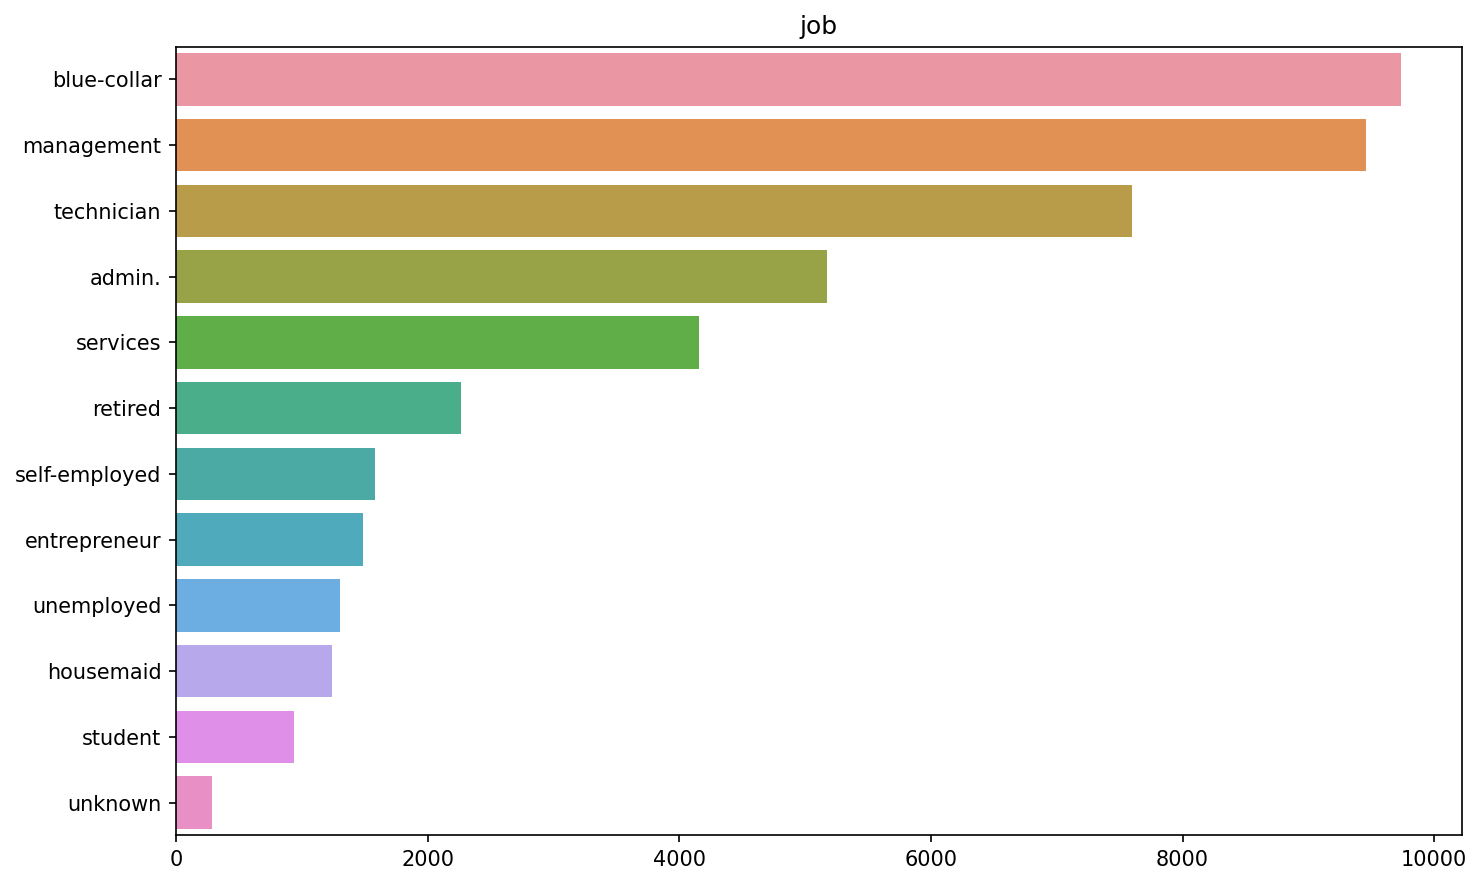

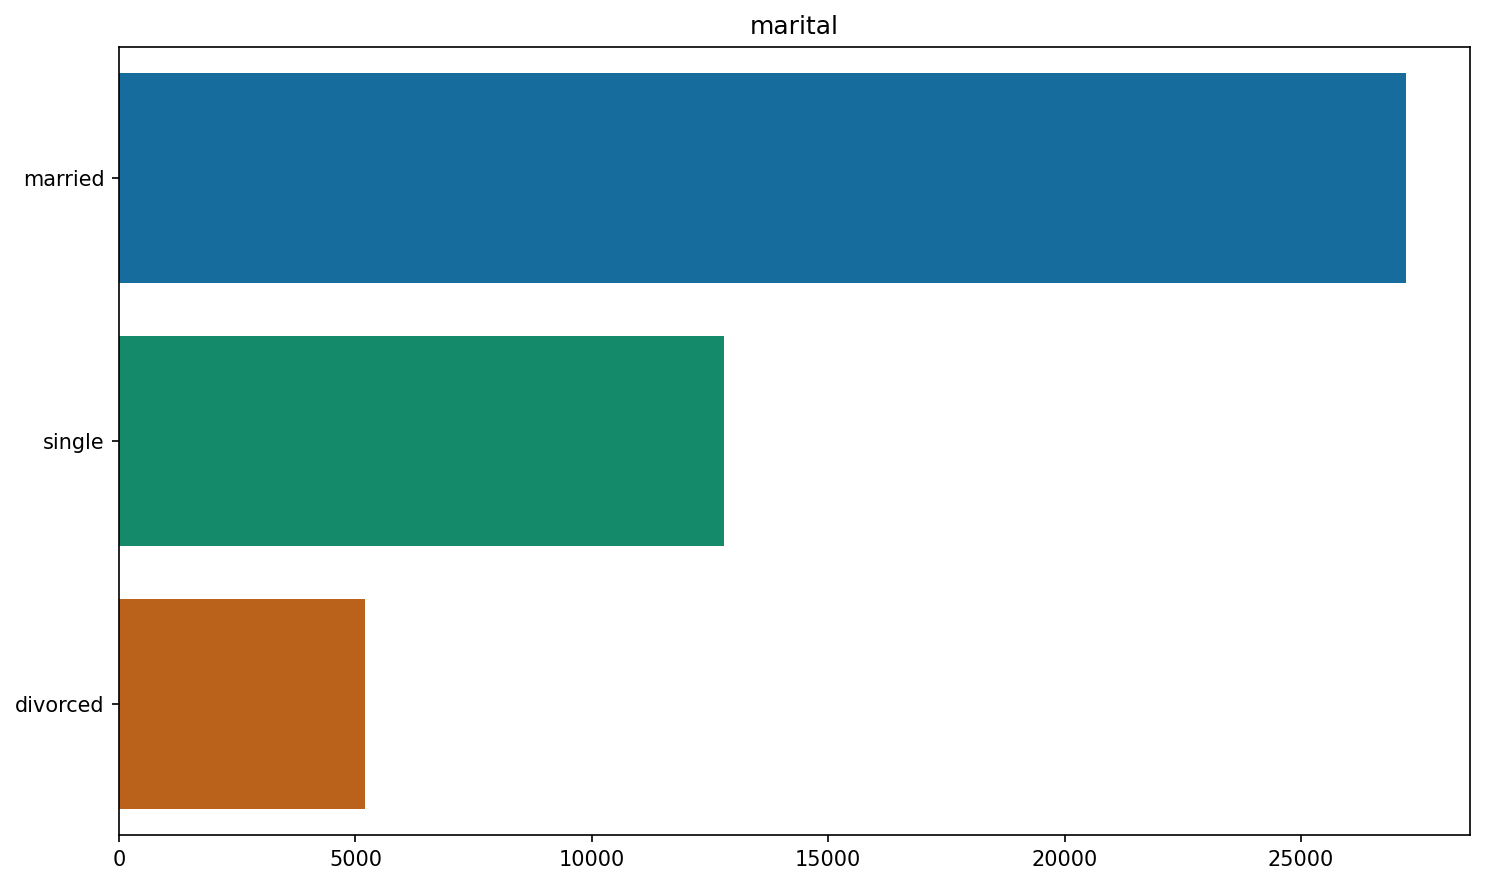

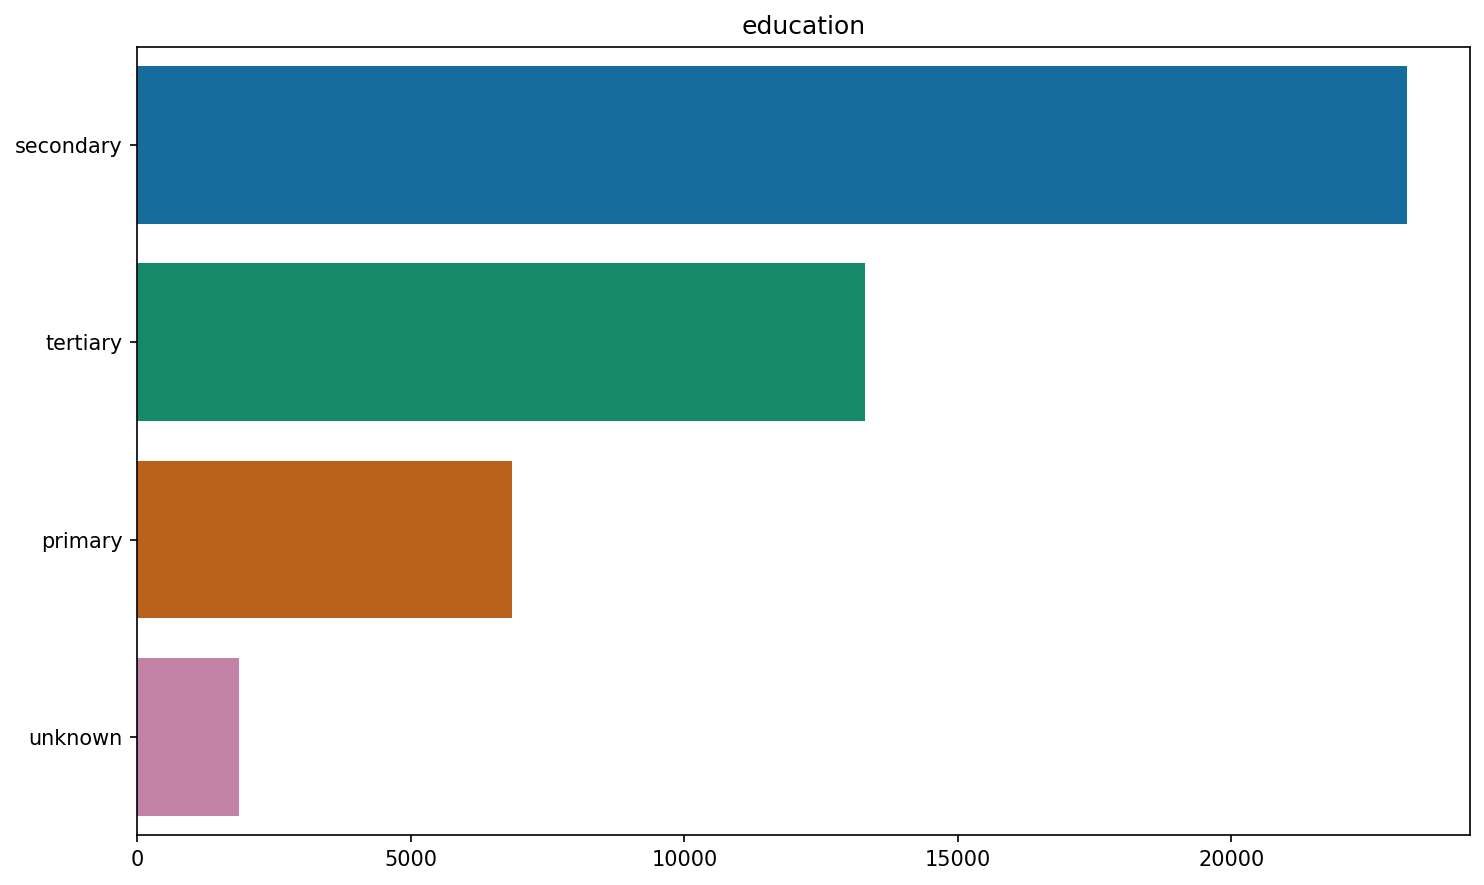

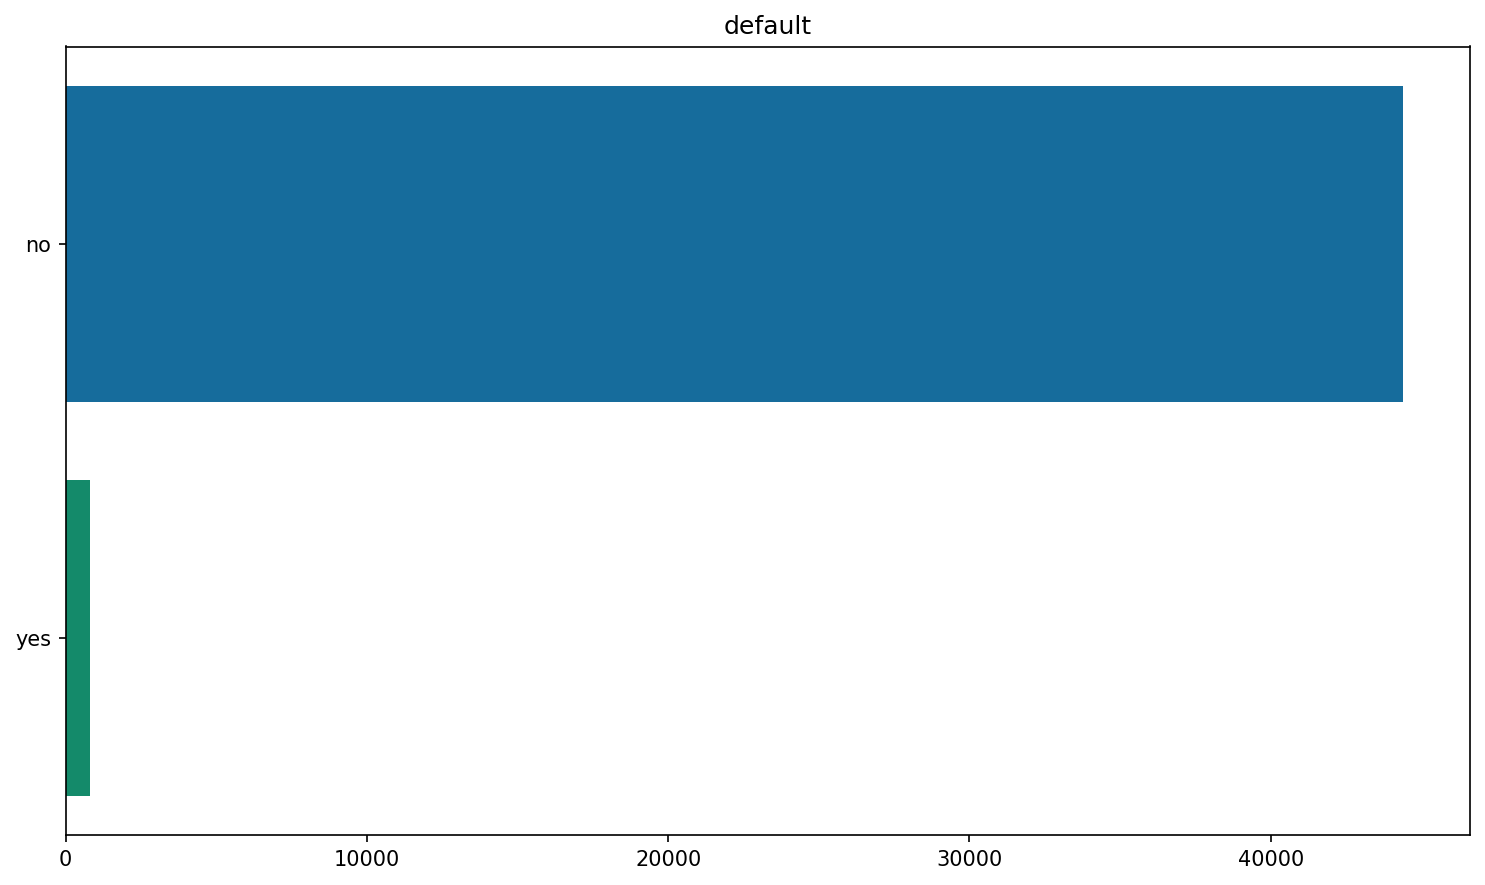

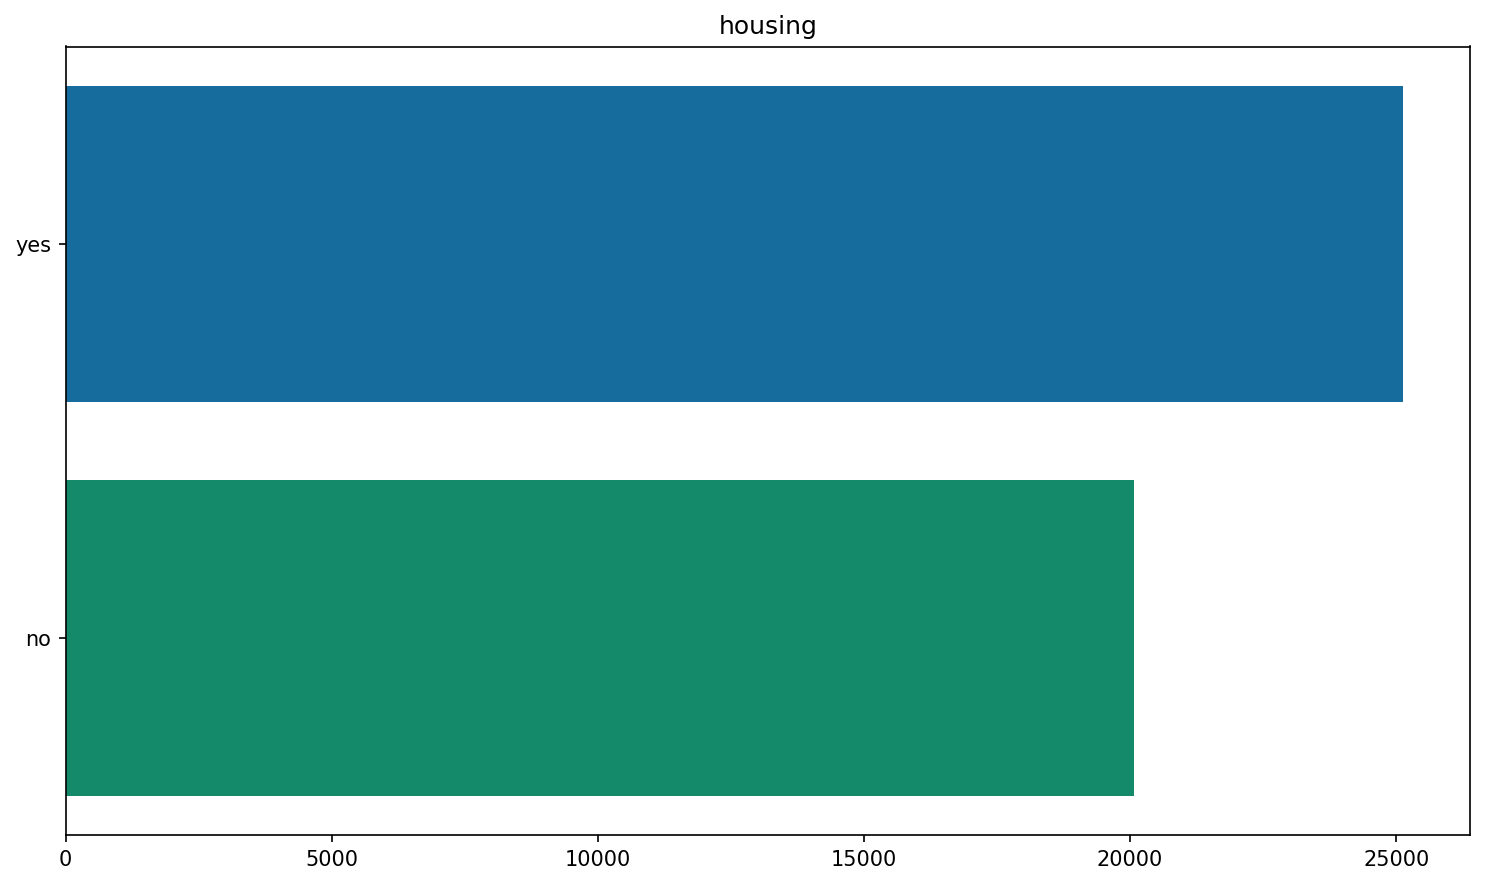

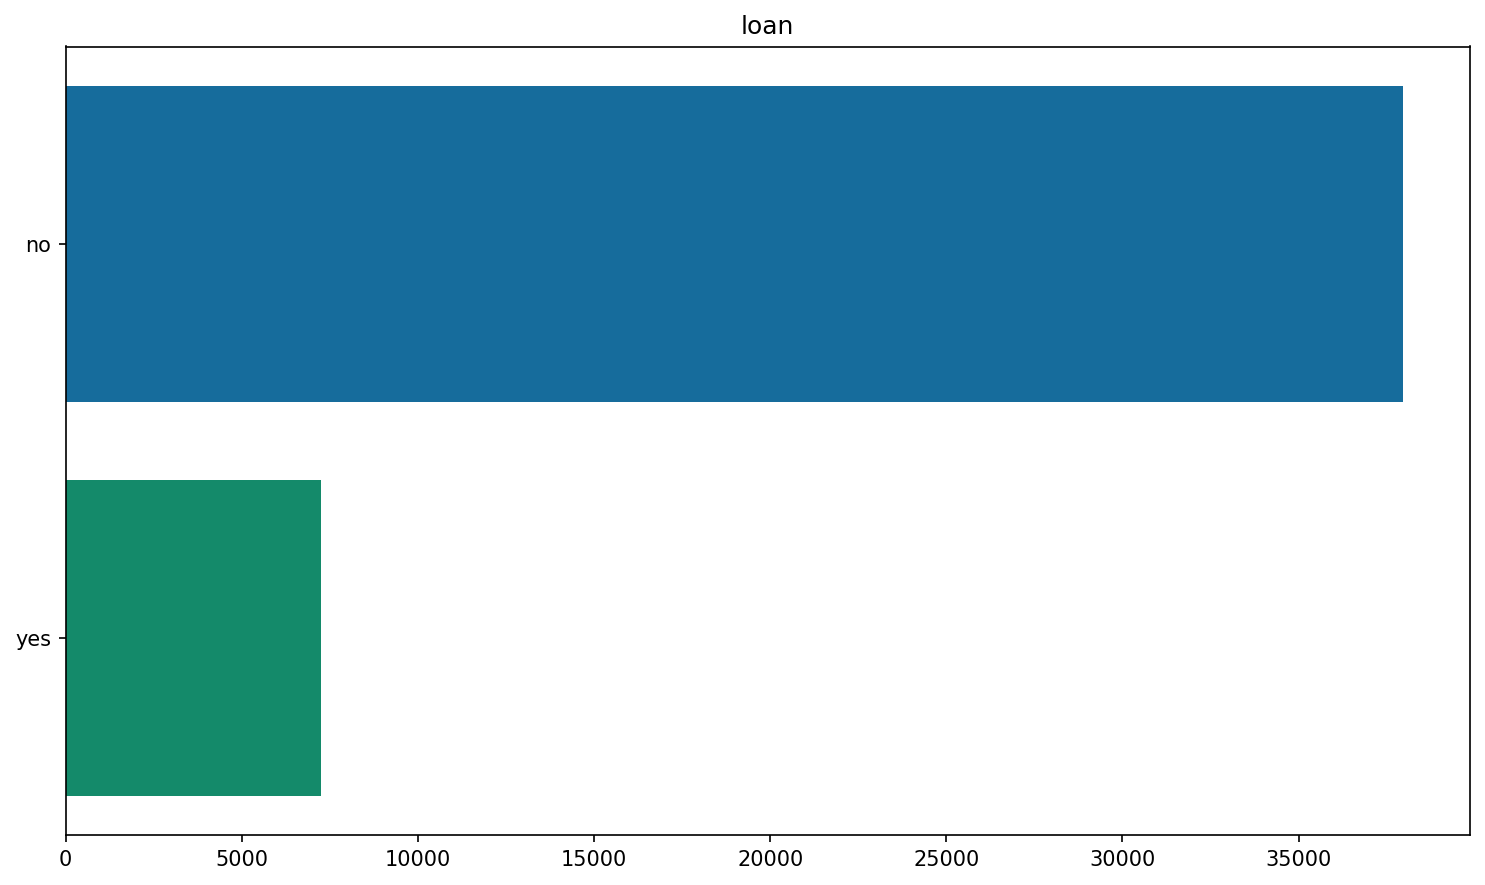

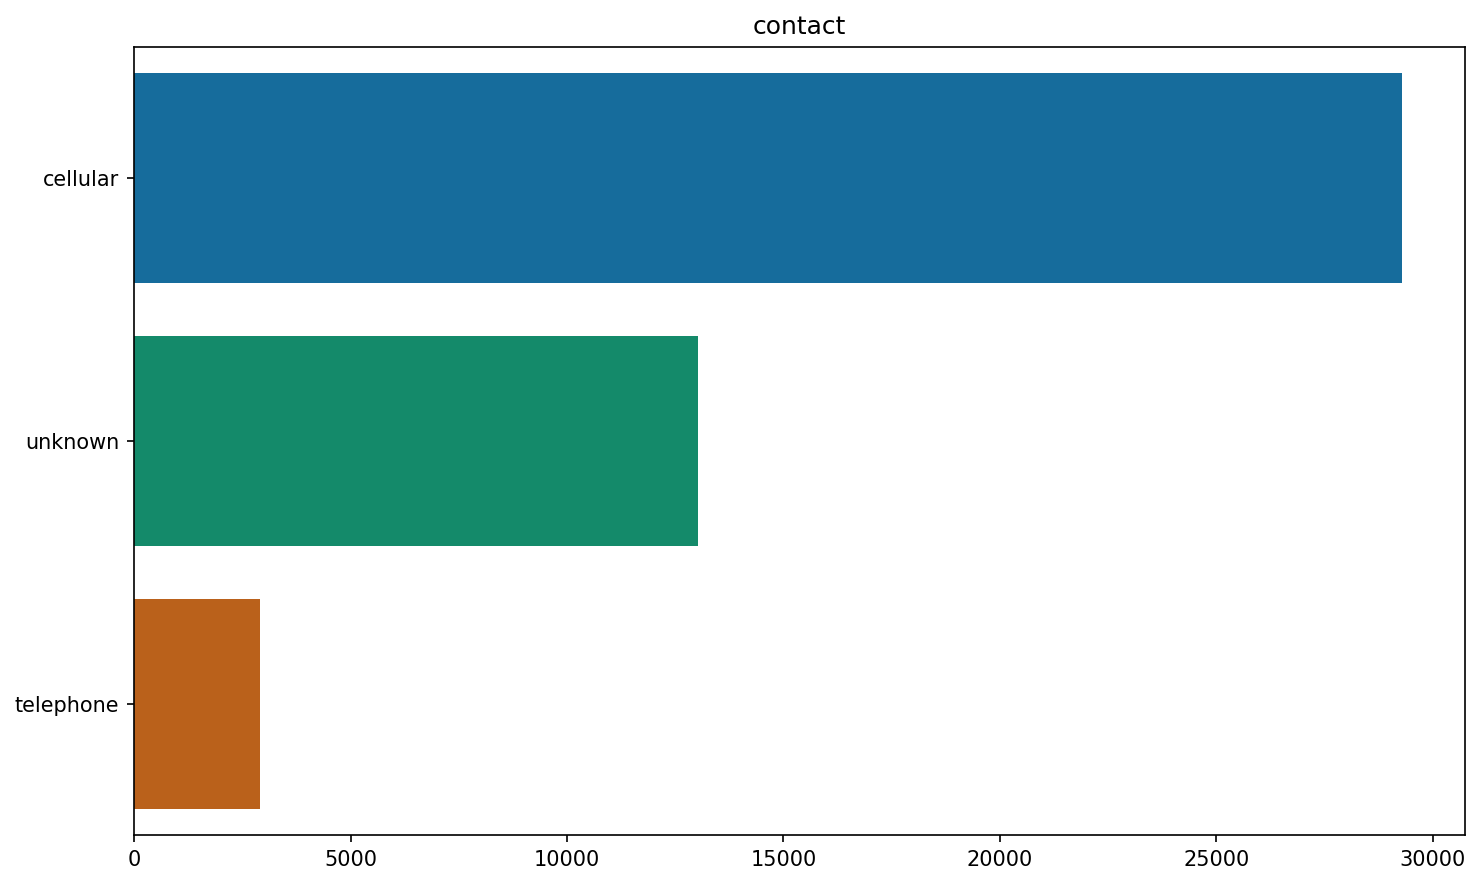

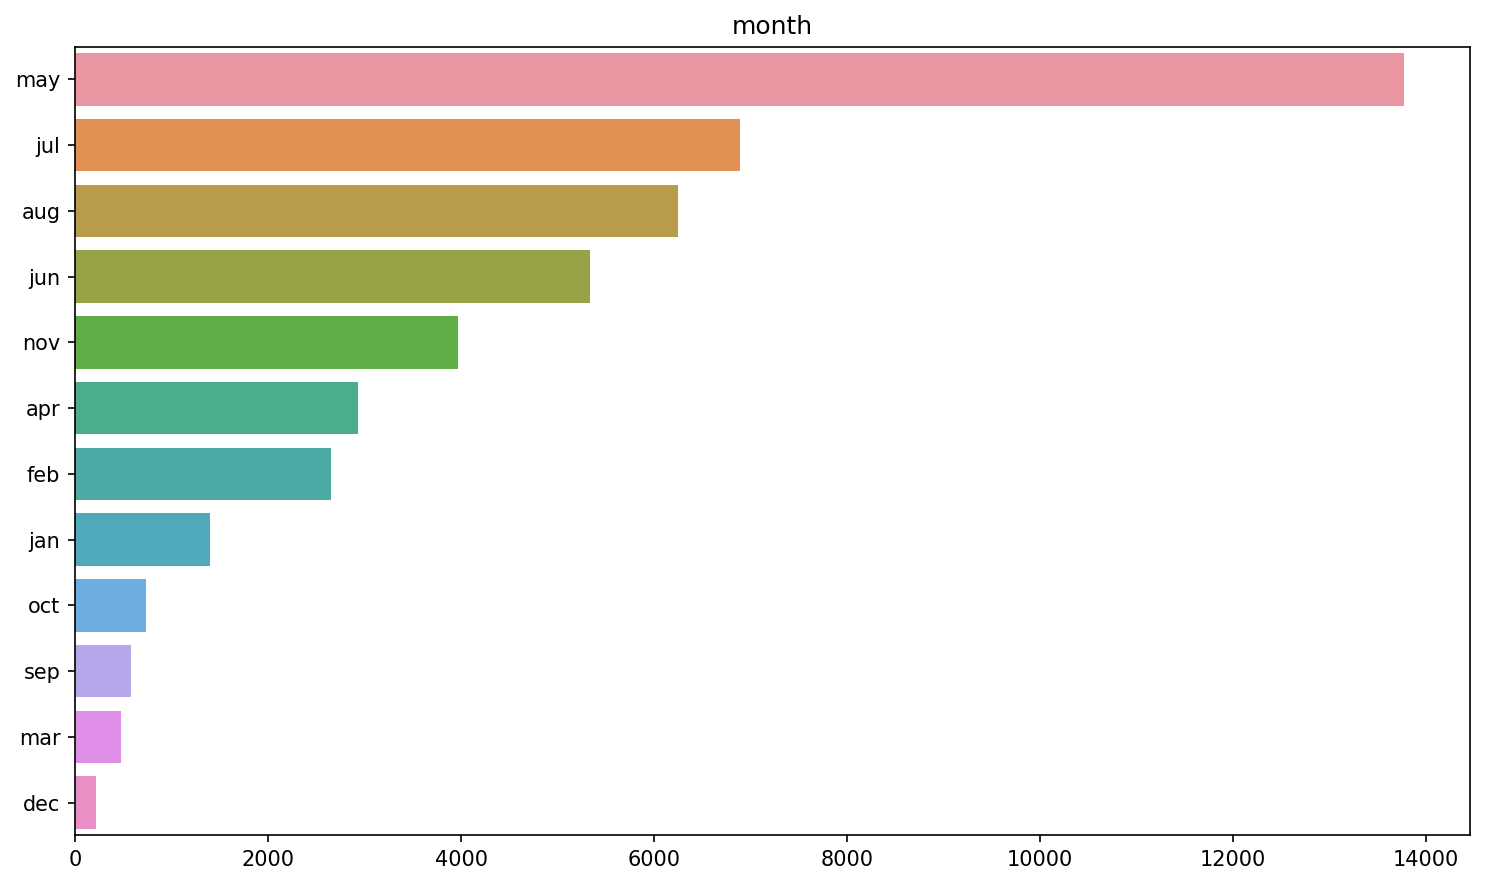

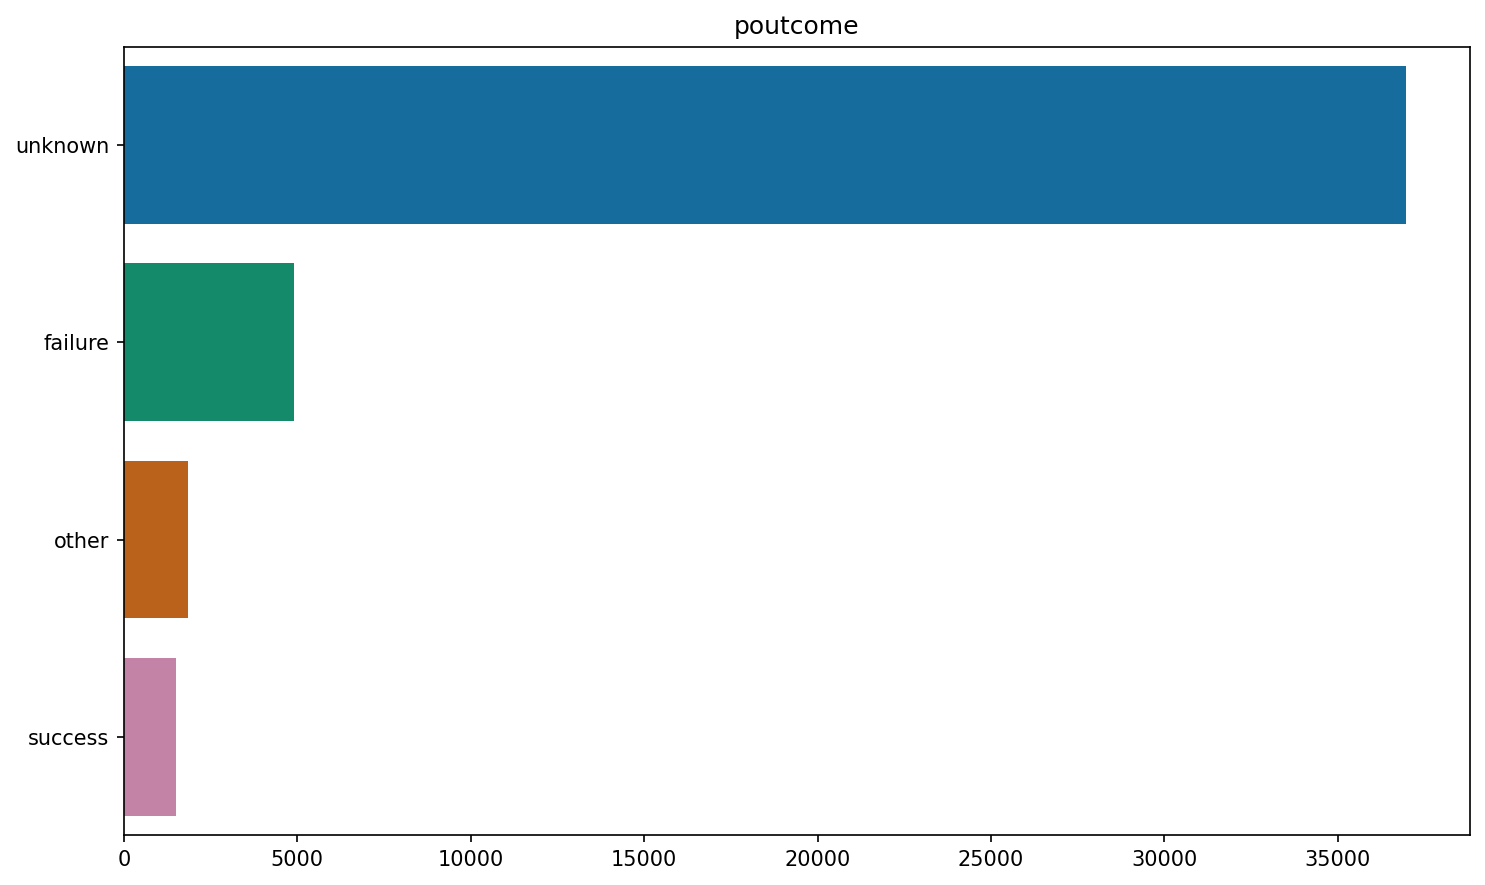

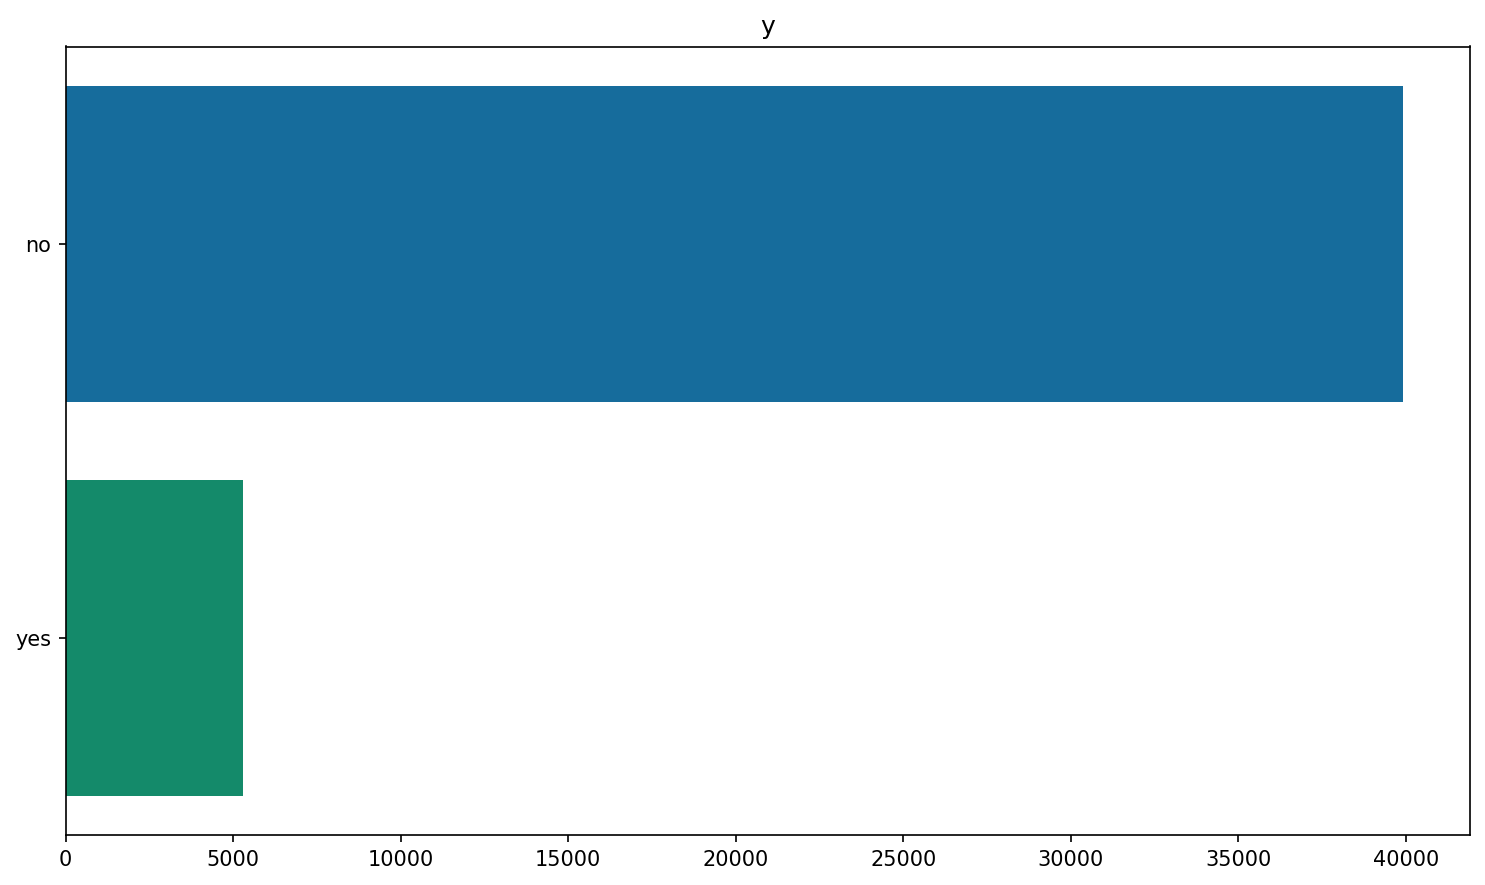

In [77]:
# See what are the categories and are there any missing values for these categories.
for col in category_cols:
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

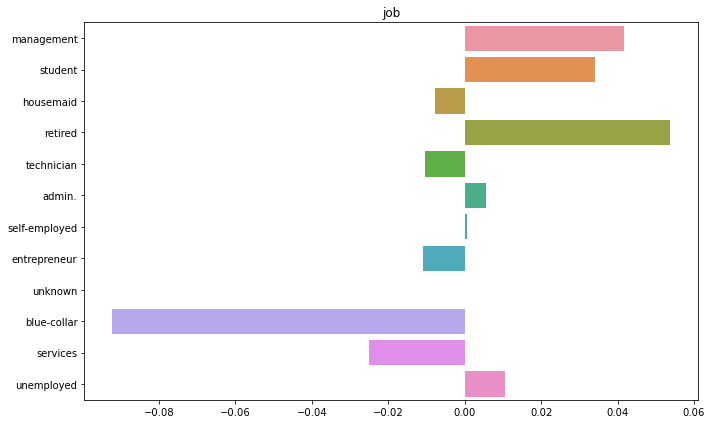

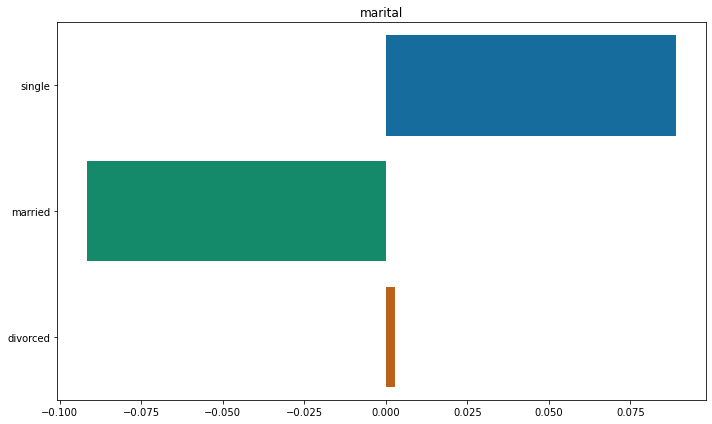

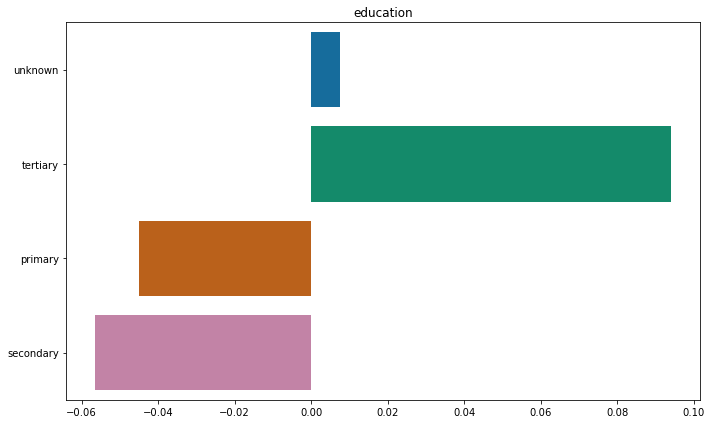

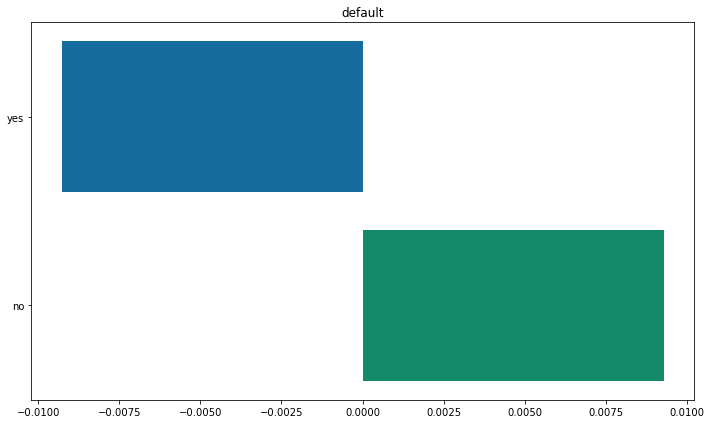

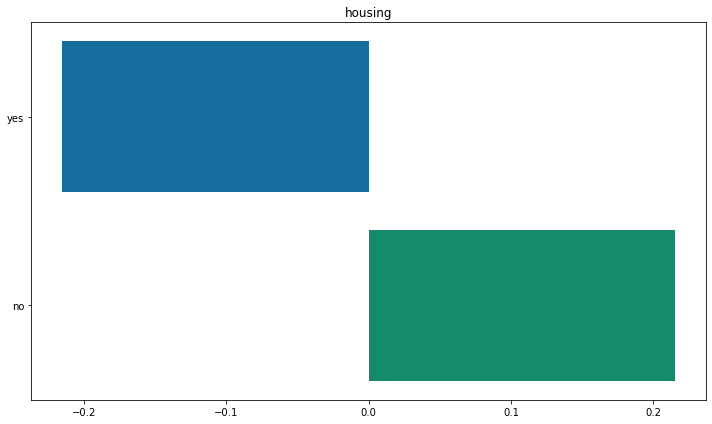

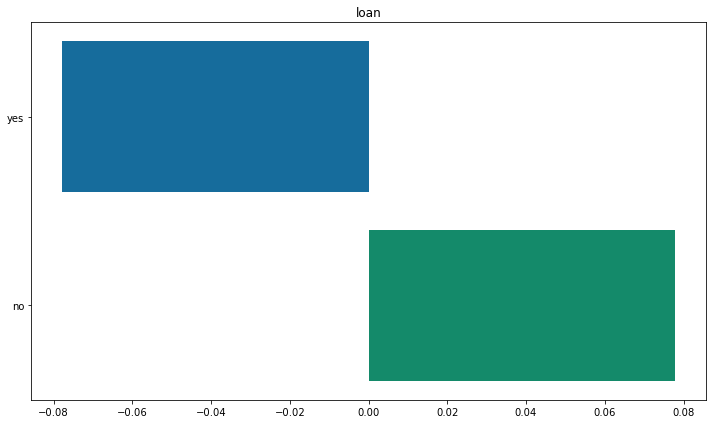

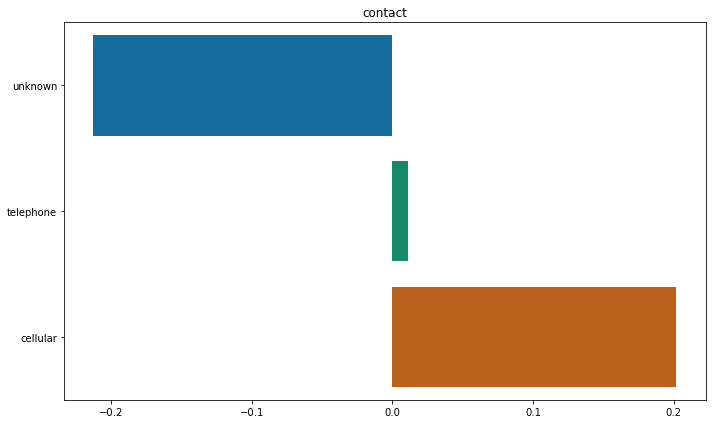

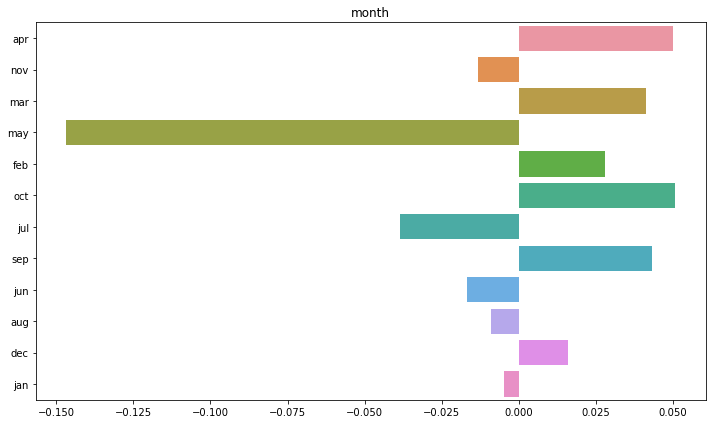

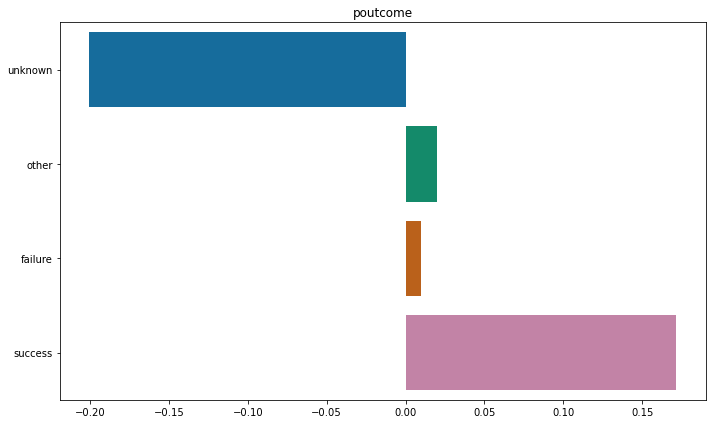

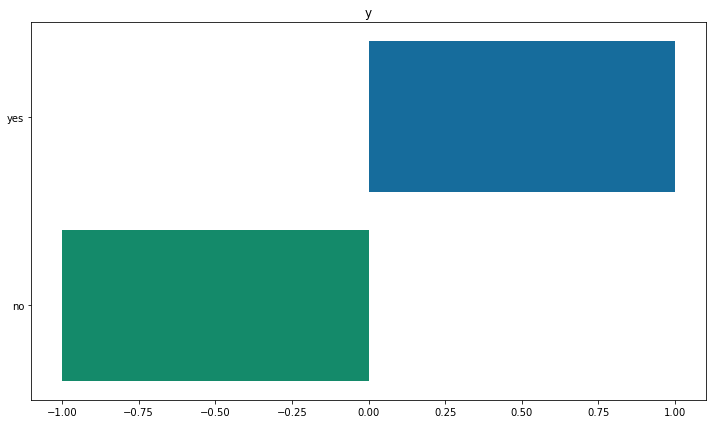

In [78]:
#List of the normalized relative frequency of the target class per category.
#Normalized distribution of each class per feature and plotted the difference between positive and negative frequencies. 
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.

for col in category_cols:
    plt.figure(figsize=(10, 6))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts()
    neg_counts = df.loc[df.y.values == 'no' ,  col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    # Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
    
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()


In [79]:
df.default.replace('unknown', 'no', inplace=True)

In [80]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)


In [81]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [82]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [83]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

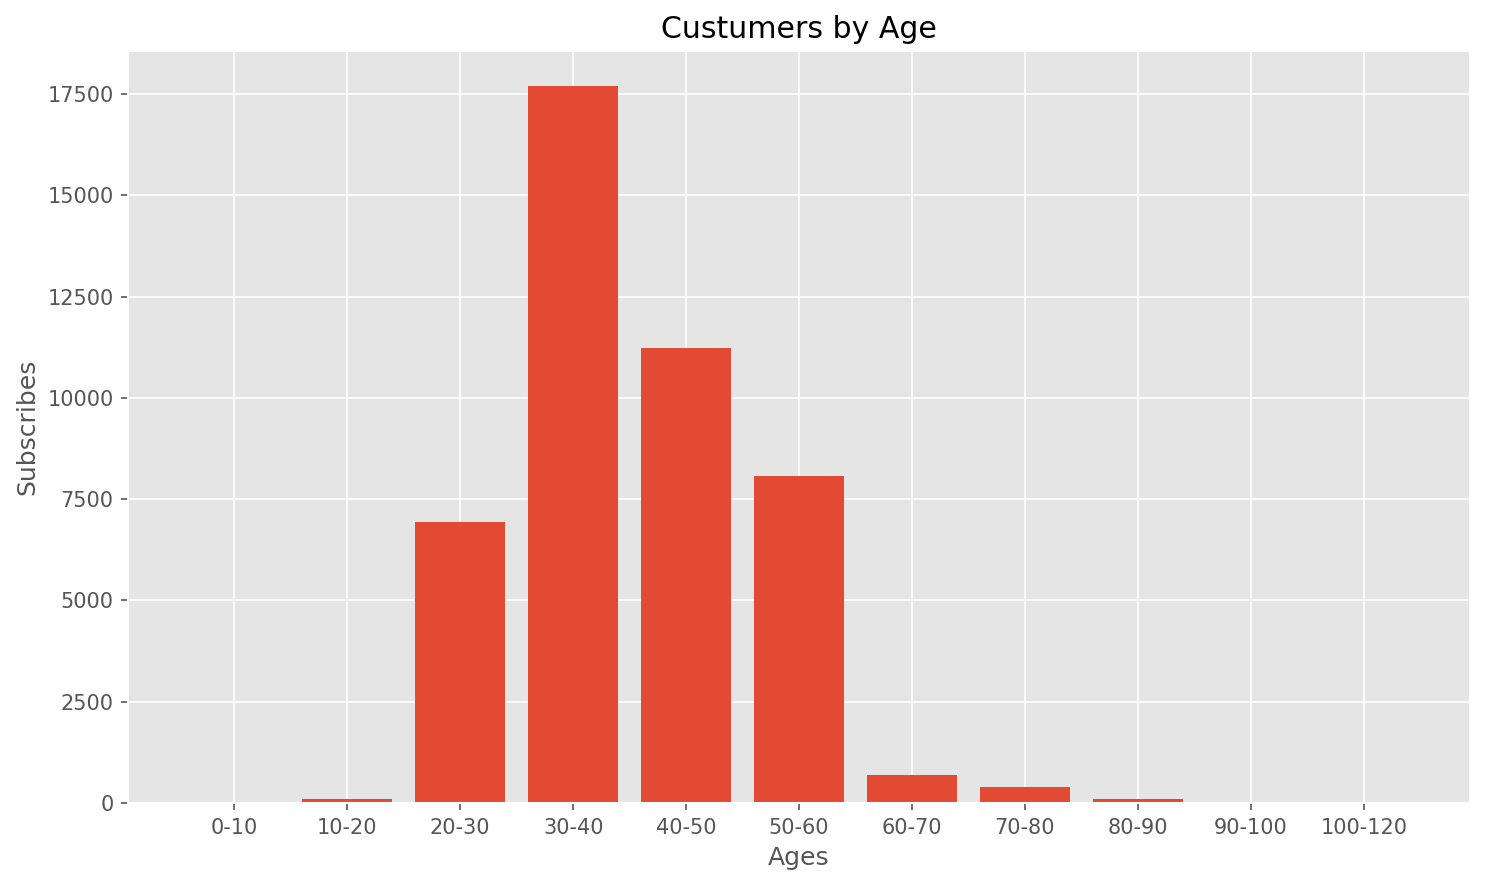

In [144]:
df['bin'] = pd.cut(df['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

In [98]:
binomial = stats.binom(n=100, p=0.8)
p_value = 1 - binomial.cdf(84)

In [122]:
print(1- binomial.cdf(84))

0.12850551483879746


In [99]:
p_value

0.12850551483879746

In [100]:
stats.test_1samp

AttributeError: module 'scipy.stats' has no attribute 'test_1samp'

In [110]:
from scipy.stats import ttest_1samp
import numpy as np   
 


ages = df.age
 
#Calculate the Mean of the ages
mu = round(np.mean(ages))
mu

41

In [134]:
custum_yes_df = df.loc[df.y == 'yes']
custum_yes_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bin
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1.0,0,unknown,yes,50-60
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1.0,0,unknown,yes,50-60
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1.0,0,unknown,yes,40-50
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1.0,0,unknown,yes,50-60
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1.0,0,unknown,yes,50-60


In [136]:
custum_no_df = df.loc[df.y == 'no']
custum_no_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1.0,0,unknown,no,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1.0,0,unknown,no,40-50
2,33,entrepreneur,married,secondary,no,2,yes,no,unknown,5,may,76,1,-1.0,0,unknown,no,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1.0,0,unknown,no,40-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1.0,0,unknown,no,30-40


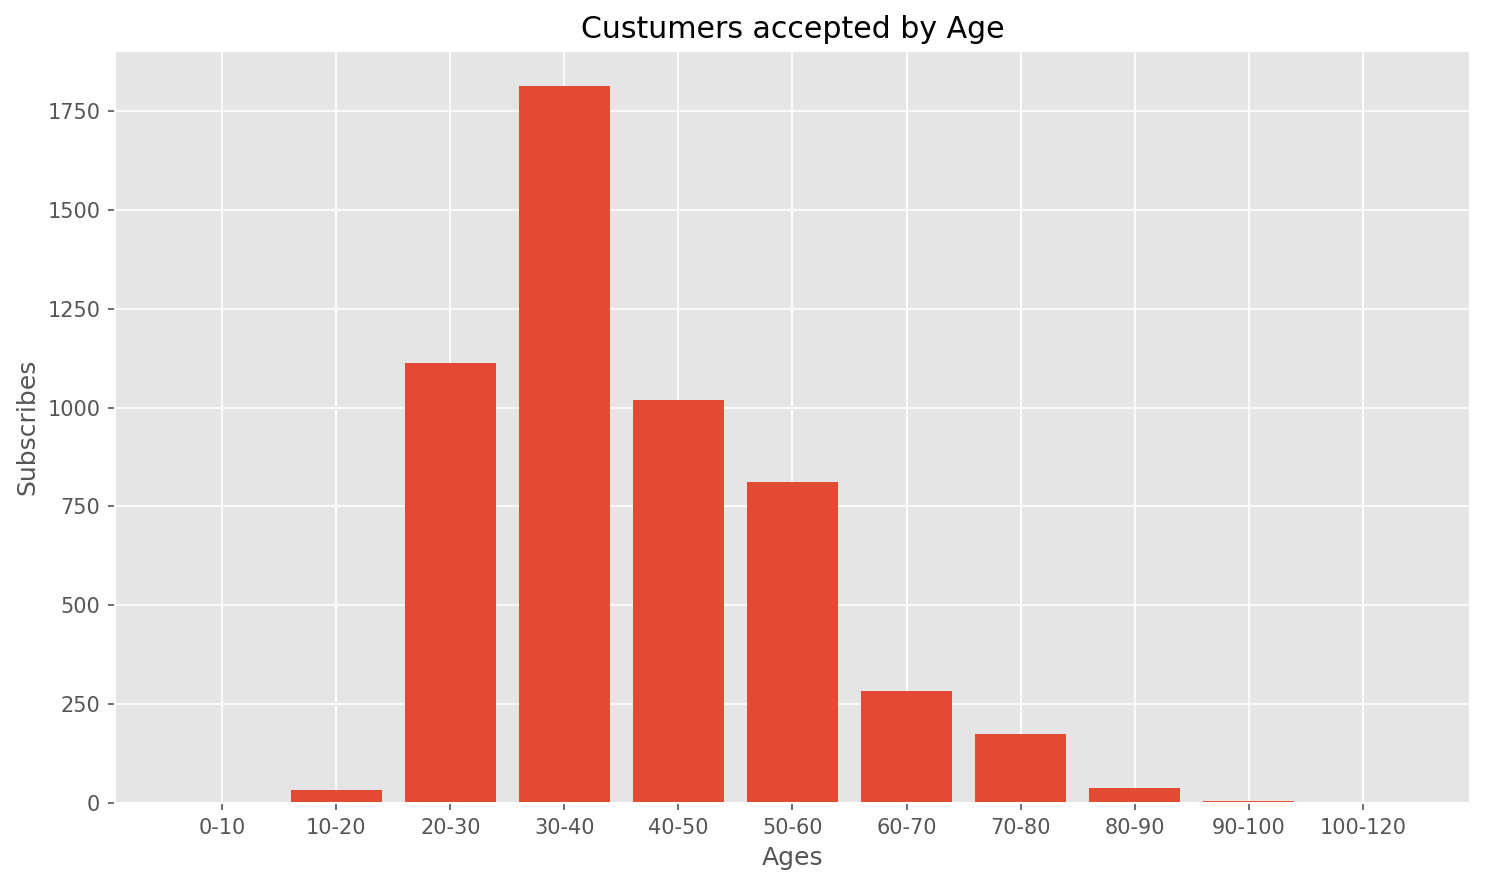

In [150]:
df['bin'] = pd.cut(custum_yes_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers accepted by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

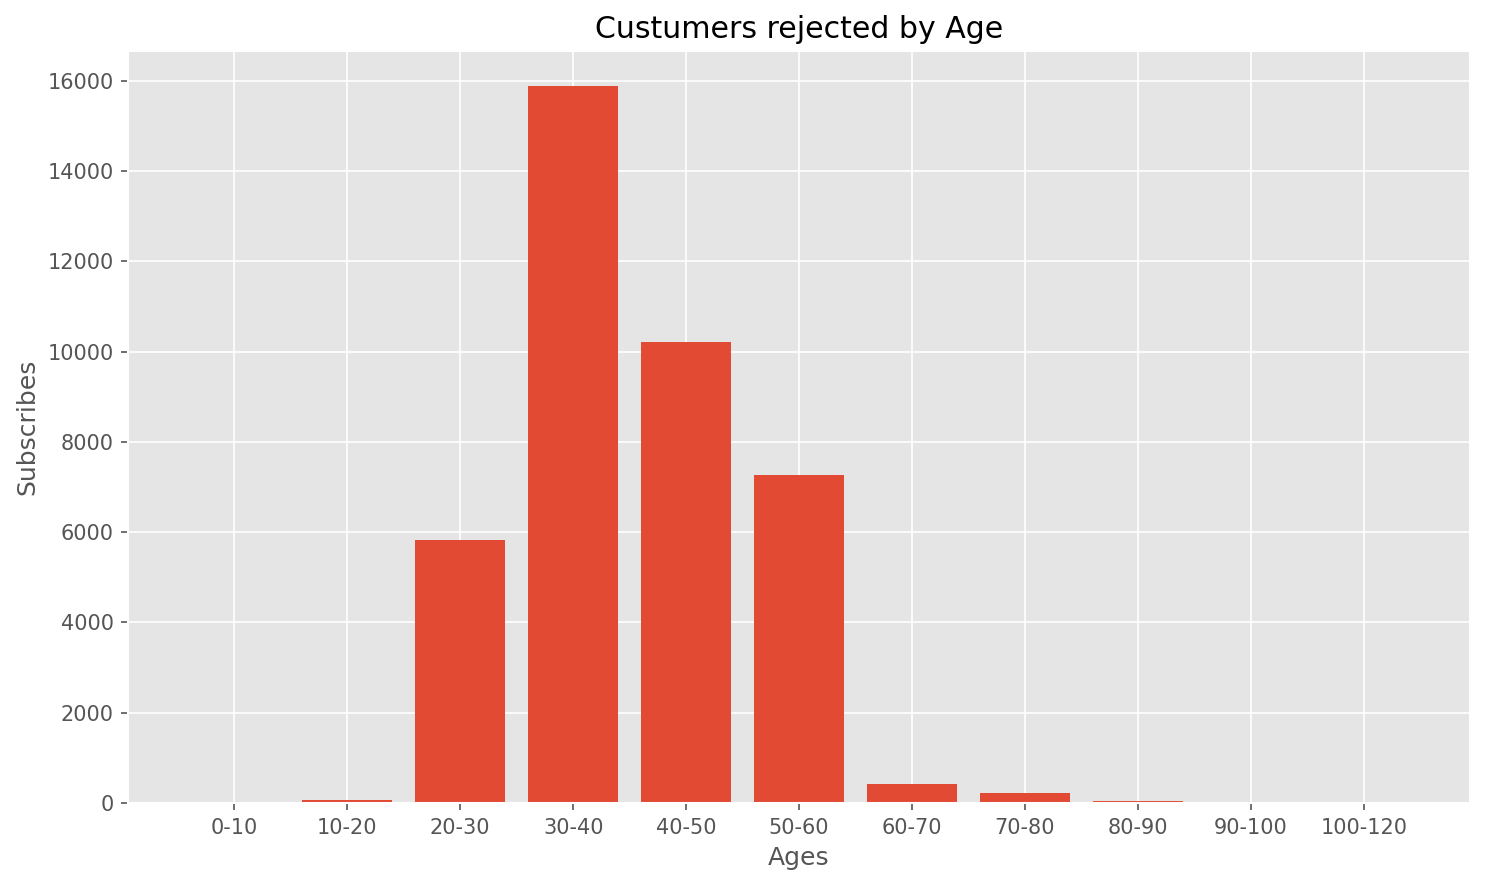

In [149]:
df['bin'] = pd.cut(custum_no_df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120],
                   labels=['0-10', '10-20','20-30', '30-40', '40-50', '50-60', 
                           '60-70', '70-80', '80-90', '90-100','100-120'])
df['bin'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('ggplot')
plt.bar(['0-10', '10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', 
         '80-90', '90-100','100-120'], df['bin'].value_counts().sort_index())
ax.set_title('Custumers rejected by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Subscribes')
plt.tight_layout()

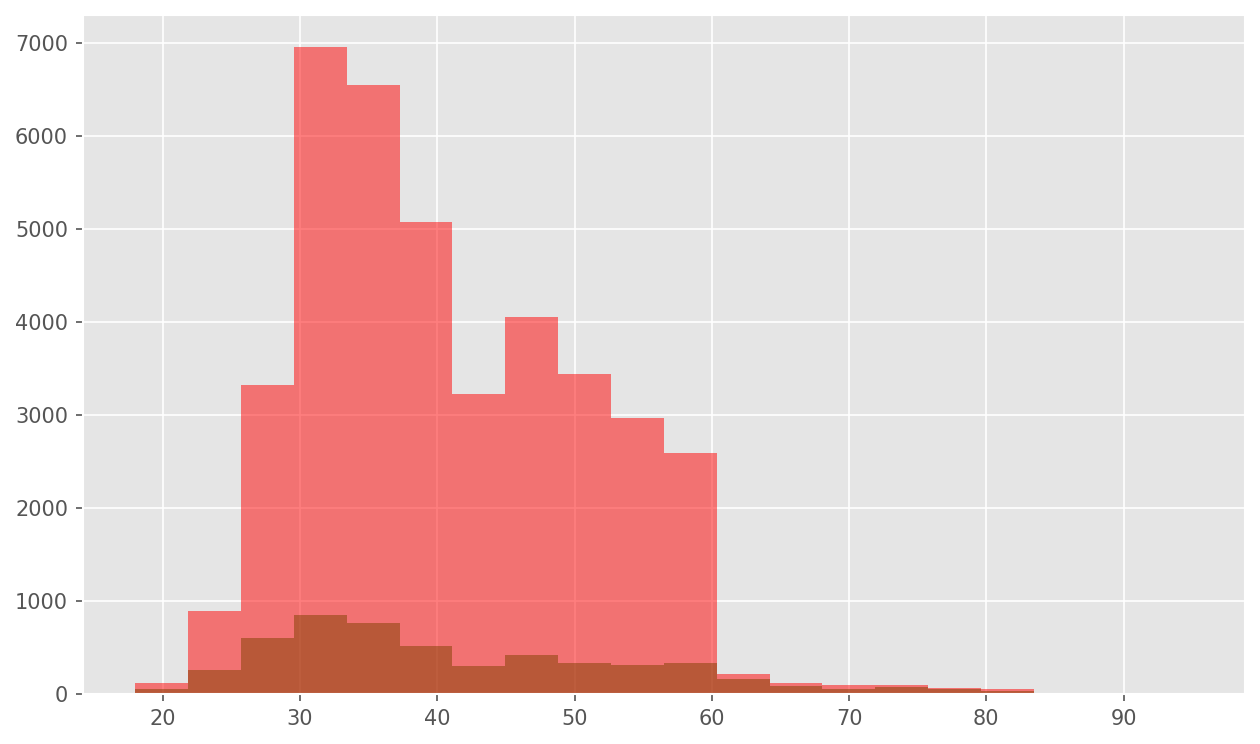

In [156]:
# plot
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
plt.style.use('seaborn-colorblind')
plt.hist(custum_yes_df.age, bins=20, color='g', alpha=0.5)
plt.hist(custum_no_df.age, bins=20, color='r', alpha=0.5)
plt.show()



5289
39922


In [177]:
'''
pY=P(Client accepts a term deposit)
 
pN=P(Client reject a term deposit)

H0: pY≤pN
'''



from scipy.stats import ttest_ind  
 
custum_yes_mean = custum_yes_df.age.mean()
custum_no_mean = custum_no_df.age.mean()
 
print("custum_yes_mean Sample Mean:", custum_yes_mean)
print("custum_no_mean Sample Mean:", custum_no_mean)
 
statistic, pval = ttest_ind(custum_yes_df.age,custum_no_df.age)
pval

custum_yes_mean Sample Mean: 41.670069956513515
custum_no_mean Sample Mean: 40.83898602274435


8.825643691922395e-08

In [159]:
if pval[1] < 0.05:
 print("pval is ", pval[1], "Null Hypothesis Rejected")
 print("samples are statistically different")
else:
 print("pval is ", pval[1], "Null Hypothesis Accepted")
 print("samples are NOT statistically different")

pval is  8.825643691922395e-08 Null Hypothesis Rejected
samples are statistically different


In [174]:
print(len(custum_yes_df))
print(len(custum_no_df))

5289
39922


In [176]:
# Frequency client accepts in a sample≈Normal(pY,pY(1−pY)/len(custum_yes_df))
# Frequency client rejects in a sample≈Normal(pN,pN(1−pN)/len(custum_no_df))

# Difference in sample frequencies between accept and reject ≈ Normal(pY−pN,pN(1−pN)/len(custum_yes_df)+pY(1−pY)/len(custum_no_df))
# H0: pY=pN≡p
# Difference in sample frequencies between accept and reject≈Normal(0,p(1−p)/len(custum_yes_df)+p(1−p)/len(custum_no_df))
 

stats.no

stats.norm(0, ((pval(1−pval)/len(custum_yes_df)) + (pval(1−pval)/len(custum_no_df)) )

SyntaxError: invalid character in identifier (<ipython-input-176-c61068dfe8bd>, line 11)

In [ ]:
a = 0.05

In [181]:
dsi_ages = [25., 32., 20., 18., 28., 32., 31., 19., 34., 34., 23., 29., 17.,
            23., 25., 31., 32., 29., 29., 24., 22., 28., 26., 24., 23.]

wdi_ages = [20., 25., 27., 19., 22., 26., 24., 27., 24., 20., 25., 28., 18.,
            19., 23., 28., 19., 19., 19., 25., 29., 26., 23., 23., 22.]

statistic, pval = ttest_ind(dsi_ages,wdi_ages, equal_var = False)

In [182]:
round(pval,3)

0.013

In [183]:
statistic

2.582956106835748